In [1]:
import warnings
warnings.filterwarnings('ignore') #para ignorar erros
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #biblitoca para gráficos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix #métricas de classificação

#Importa os métodos de classificação

# importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import SVM
from sklearn.svm import SVC
#import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df_food = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/food.csv')
df_food.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Manganese,Data.Niacin,Data.Pantothenic Acid,Data.Protein,Data.Refuse Percentage,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Household Weights.1st Household Weight,Data.Household Weights.1st Household Weight Description,Data.Household Weights.2nd Household Weight,Data.Household Weights.2nd Household Weight Description,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,0.0,717,0,0,0.000,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,21.021,3.043,51.368,81.11,227.00,1 cup,14,1 tbsp,24,0.000,0.02,2,24,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,0.0,717,0,0,0.004,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,23.426,3.012,50.489,81.11,151.00,1 cup,9,1 tbsp,24,0.016,0.16,2,23,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,0.0,876,0,0,0.000,0.003,0.010,0.28,0,824,0.005,0.0,0.00,0.001,0.24,28.732,3.694,61.924,99.48,205.00,1 cup,13,1 tbsp,4,0.001,0.00,0,3,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,0.0,353,0,0,0.009,1.016,1.729,21.40,0,192,0.382,14.5,0.50,0.029,42.41,7.778,0.800,18.669,28.74,28.35,1 oz,17,1 cubic inch,528,0.040,0.31,23,387,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,0.0,371,0,0,0.012,0.118,0.288,23.24,0,286,0.351,14.5,0.51,0.014,41.11,8.598,0.784,18.764,29.68,132.00,"1 cup, diced",113,"1 cup, shredded",674,0.024,0.43,24,451,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [91]:
# no null values overall
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [93]:
#conta as diferentes classes
print("Contagem da variável output")
df_food['Category'].value_counts()

Contagem da variável output


BEEF                                                        457
PORK                                                        304
CEREALS RTE                                                 291
BABYFOOD                                                    221
LAMB                                                        198
                                                           ... 
Buffalo                                                       1
RADICCHIO                                                     1
STOUFFER'S HOMESTYLE SALISBURY STEAK IN GRAVY & MAC& CHS      1
BREAKFAST BARS                                                1
Seal                                                          1
Name: Category, Length: 1183, dtype: int64

In [94]:
s = df_food['Category'].value_counts() #filtra somente as classes que possuem mais registros
df_food2=df_food[df_food.isin(s.index[s >= 200]).values]

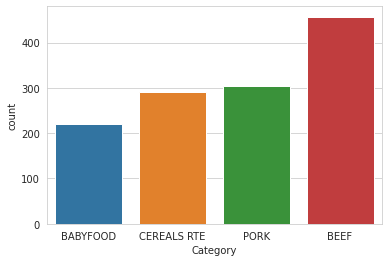

In [56]:
df_food2.Category.nunique()  #unique values
#exibe gráfico com os plots
sns.set_style('whitegrid')
sns.countplot(df_food2['Category'])

In [95]:
del df_food2['Description'] #elimina a colunas que são do tipo objeto
del df_food2['Data.Household Weights.2nd Household Weight Description'] 
del df_food2['Data.Household Weights.1st Household Weight Description']

In [96]:
X = df_food2.drop('Category', axis = 1)
y = df_food2['Category']

In [97]:
#separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
print(X_train)

      Nutrient Data Bank Number  ...  Data.Vitamins.Vitamin K
2599                      10101  ...                      0.0
2577                      10074  ...                      0.0
2677                      10203  ...                      0.0
3863                      13459  ...                      0.0
3756                      13327  ...                      3.9
...                         ...  ...                      ...
3998                      13915  ...                      0.0
6780                      23004  ...                      0.0
6848                      23559  ...                      1.2
3814                      13396  ...                      0.0
6844                      23552  ...                      0.0

[891 rows x 44 columns]


In [99]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [100]:
#realiza o treinamento no modelo RandomForest
ran_fc = RandomForestClassifier()
ran_fc.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
#realiza a predição ou seja o teste
rfc_pred = ran_fc.predict(X_test)

In [102]:
print("Resultado do Modelo RandomForest")
print(classification_report(y_test, rfc_pred)) #realiza a comparação entre o real e o predito

Resultado do Modelo RandomForest
              precision    recall  f1-score   support

    BABYFOOD       0.98      0.97      0.98        63
        BEEF       1.00      0.99      1.00       134
 CEREALS RTE       0.99      1.00      1.00       102
        PORK       0.99      1.00      0.99        83

    accuracy                           0.99       382
   macro avg       0.99      0.99      0.99       382
weighted avg       0.99      0.99      0.99       382



Resultado da matriz de Confusão do RandomForest


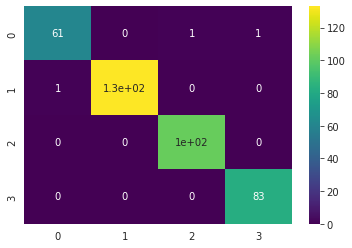

In [103]:
print("Resultado da matriz de Confusão do RandomForest")
confu_mat = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [104]:
#realiza o treinamento no modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#realiza a predição
knn_pred = knn_model.predict(X_test)

Resultado do Modelo KNN
              precision    recall  f1-score   support

    BABYFOOD       0.98      0.98      0.98        63
        BEEF       0.97      0.95      0.96       134
 CEREALS RTE       0.99      0.99      0.99       102
        PORK       0.92      0.95      0.93        83

    accuracy                           0.97       382
   macro avg       0.97      0.97      0.97       382
weighted avg       0.97      0.97      0.97       382

Resultado da matriz de Confusão do KNN


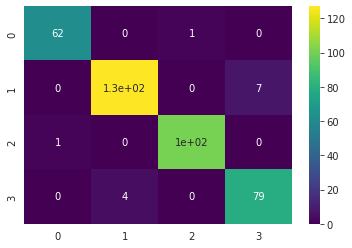

In [107]:
print("Resultado do Modelo KNN")
print(classification_report(y_test, knn_pred))
print("Resultado da matriz de Confusão do KNN")
confu_mat = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [108]:
#realiza o treinamento no modelo Gaussiano
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

#realiza a predição
gaus_pred = gaus_model.predict(X_test)


Resultado do Modelo Naive Bayes
              precision    recall  f1-score   support

    BABYFOOD       0.29      1.00      0.44        63
        BEEF       0.66      0.79      0.72       134
 CEREALS RTE       0.00      0.00      0.00       102
        PORK       0.00      0.00      0.00        83

    accuracy                           0.44       382
   macro avg       0.24      0.45      0.29       382
weighted avg       0.28      0.44      0.33       382

Resultado da matriz de Naive Bayes


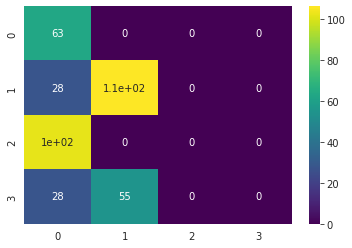

In [109]:
print("Resultado do Modelo Naive Bayes")
print(classification_report(y_test, gaus_pred))
print("Resultado da matriz de Naive Bayes")
confu_mat = confusion_matrix(y_test, gaus_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [110]:
#realiza o treinamento no modelo SVM
svm_model = SVC() 
svm_model.fit(X_train, y_train)

#realiza a predição
svm_pred = svm_model.predict(X_test)

Resultado do Modelo SVM
              precision    recall  f1-score   support

    BABYFOOD       0.97      0.95      0.96        63
        BEEF       0.98      0.98      0.98       134
 CEREALS RTE       0.95      0.99      0.97       102
        PORK       0.98      0.95      0.96        83

    accuracy                           0.97       382
   macro avg       0.97      0.97      0.97       382
weighted avg       0.97      0.97      0.97       382

Resultado da matriz de SVM


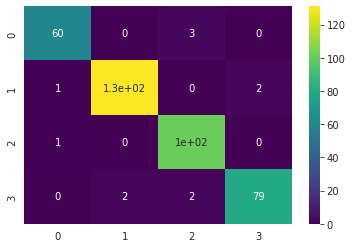

In [111]:
print("Resultado do Modelo SVM")
print(classification_report(y_test, svm_pred))
print("Resultado da matriz de SVM")
confu_mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [112]:
#realiza o treinamento no modelo Tree
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

#realiza a predição
tree_pred = tree_model.predict(X_test)


Resultado do Modelo Tree
              precision    recall  f1-score   support

    BABYFOOD       0.95      1.00      0.98        63
        BEEF       1.00      0.99      1.00       134
 CEREALS RTE       0.99      0.97      0.98       102
        PORK       1.00      1.00      1.00        83

    accuracy                           0.99       382
   macro avg       0.99      0.99      0.99       382
weighted avg       0.99      0.99      0.99       382

Resultado da matriz de Tree


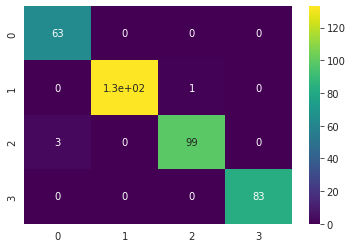

In [113]:
print("Resultado do Modelo Tree")
print(classification_report(y_test, tree_pred))
print("Resultado da matriz de Tree")
confu_mat = confusion_matrix(y_test, tree_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [114]:
#realiza o treinamento no modelo Rede Neural Multi Layer Perceptron
mlp_model = MLPClassifier(random_state=1, max_iter=300) 
mlp_model.fit(X_train, y_train)

#realiza a predição
mlp_pred = mlp_model.predict(X_test)

Resultado do Modelo Rede Neural Multi Layer Perceptron
              precision    recall  f1-score   support

    BABYFOOD       0.98      1.00      0.99        63
        BEEF       0.99      1.00      1.00       134
 CEREALS RTE       1.00      0.99      1.00       102
        PORK       1.00      0.99      0.99        83

    accuracy                           0.99       382
   macro avg       0.99      0.99      0.99       382
weighted avg       0.99      0.99      0.99       382

Resultado da matriz Rede Neural Multi Layer Perceptron


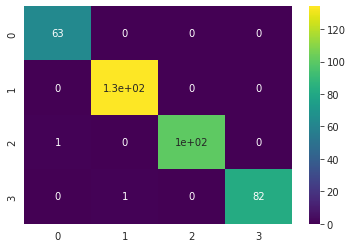

In [115]:
print("Resultado do Modelo Rede Neural Multi Layer Perceptron")
print(classification_report(y_test, mlp_pred))
print("Resultado da matriz Rede Neural Multi Layer Perceptron")
confu_mat = confusion_matrix(y_test, mlp_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')